# SW_analysis usage guide 2

This notebook will cover the usage of analysis functions based on analysis pipelines intiatied in Tutorial_10 <br>

We will first need to import some modules:

In [1]:
from modules.sw_directories import *
from modules.sw_analysis import *
import os as os

/home/dan/miniconda3/envs/AmberTools23/lib/python3.12/site-packages/MDAnalysisData/base.py:34: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_string


We will set up the universe object as in Tutorial_10

In [2]:
manager = SnippetSimManage(os.getcwd())

In [3]:
universe = initialise_analysis(manager, "3HV_10_polymer_5_5_array_crystal", "3HV_10_polymer", 10)

Output contains paths to simulation directories.


/home/dan/miniconda3/envs/AmberTools23/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


# Analysis methods

We can now start using the the "Analysis" class to do some analysis on the system. <br>

## Free volume

The first analysis we can do is to calcualtate the free volume in the system as the simulation runs.

In [4]:
Analysis.calc_free_volume(universe) # THIS IS NOT SAVING THE FILE CURRENTLY

The returned value is an average volume across this whole simulation stage. Do not report this value if a thermal ramping was used as values will not be representative of the system at any point.


18977.984645043627

This function will have saved a graph of the free volume across the simualtion as "Binned_Free_Vol_vs_Temp_BestFit.png"
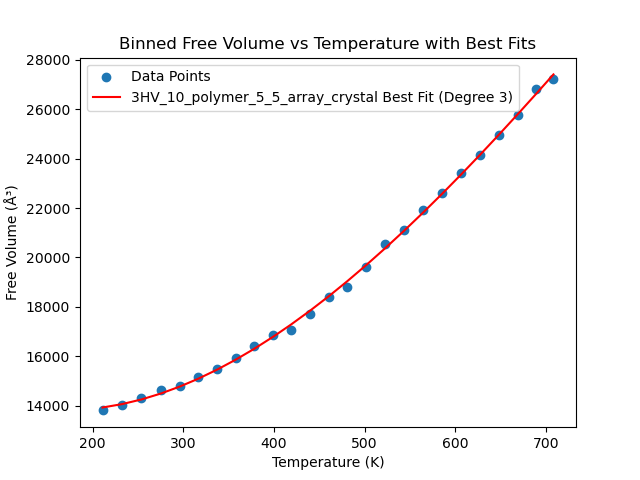

We can also compare the free volume of mutiple unvierses on the same graph. We will need to make a new universe for this - but we must call it something different (i.e. universe_two).

In [5]:
universe_two = initialise_analysis(manager, "3HB_10_polymer_5_5_array_crystal", "3HB_10_polymer", 10)

Output contains paths to simulation directories.


/home/dan/miniconda3/envs/AmberTools23/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Now we can make a list of universes to pass to a function that can plot them all on the same graph

In [6]:
universes = [universe, universe_two]

 Now we can past this list of unvierses to another function. This function will have saved a graph of the free volume across the simualtion as "Multi_Universe_Free_vol_vs_temp.png"

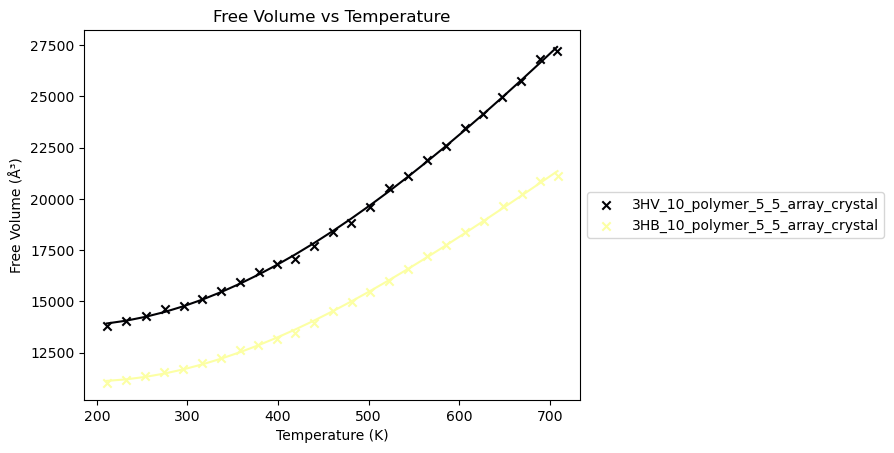

In [7]:
data_points = Analysis.calc_free_volume_multiple(universes)

## Radius of gyration

Before we calculate the radius of gyration of a polymer we need to see waht polymers we have in the system

In [8]:
universe.masterclass.poly_sel_dict

{'Polymer_1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Polymer_2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'Polymer_3': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 'Polymer_4': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
 'Polymer_5': [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
 'Polymer_6': [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
 'Polymer_7': [61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
 'Polymer_8': [71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
 'Polymer_9': [81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
 'Polymer_10': [91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
 'Polymer_11': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
 'Polymer_12': [111, 112, 113, 114, 115, 116, 117, 118, 119, 120],
 'Polymer_13': [121, 122, 123, 124, 125, 126, 127, 128, 129, 130],
 'Polymer_14': [131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
 'Polymer_15': [141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
 'Polymer_16': [151, 152, 153, 154, 155, 156, 157, 158, 159, 160],
 'Polymer_17': [161, 162, 163, 164, 165, 166,

The aobve attribute is a dictionary of all the polymers within the system and their resids. Now we can use the **select_polymer** method in the universe object to return an atom group of atoms in the polymer. We pass the string in the dictionary (i.e. "Polymer_x") to the select polymer function.

In [9]:
poly = universe.select_polymer("Polymer_1")

We can visualise this selected polymer using nglview

In [13]:
view = nv.show_mdanalysis(poly)
view

NGLWidget(max_frame=9998)

Now we pass the unvierse object and the polymer atom group to the **plot_ROG** function of the analysis class as below: <br>

*data_points = Analysis.plot_ROG(universe.object, atom_group, graph_filename=None, graph_title=None)* <br>

universe_object = universe_object from *intialise_analysis*
atom_group = an MDanalysis atom group present in the universe
graph_filename = the name you want to save the graph as - if this isn't selected the graph will not be saved in the simulation file (none by default)
graph_title = what you want the title of the graph to be - if nothing is specified it will be called "ROG_graph"



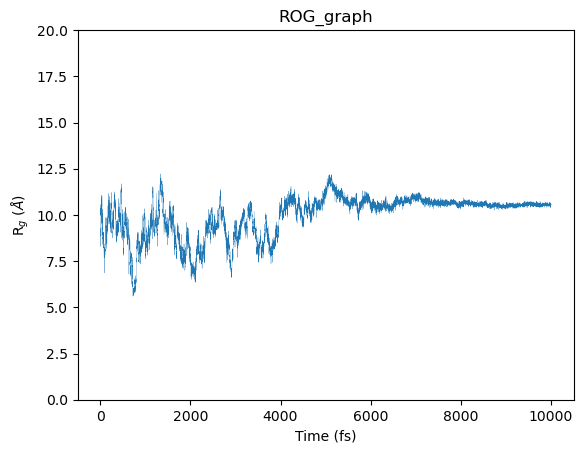

In [11]:
data_points = Analysis.plot_ROG(universe, poly)

For a 5_5_array of polymers we can plot the ROG of all of the polymers on the same graph. We only need to pass a universe object to this function and the graph title and save path are derived from this universe object. Making powerful use of having a base function that can have other functions wrapped around it.

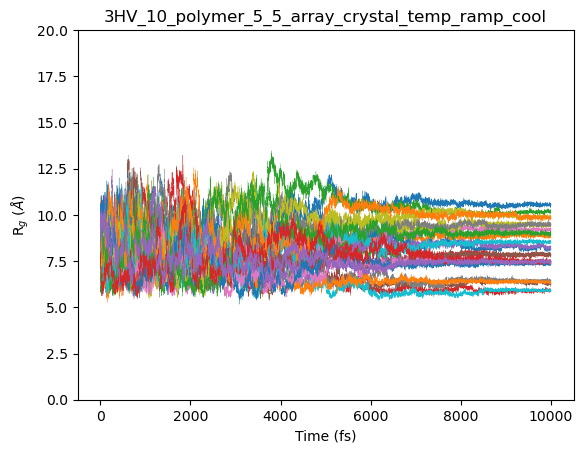

In [12]:
data_points = Analysis.plot_ROG_5_5_array(universe)